# Breast Cancer Data Set -  Classification and Validation

## Loading Dataset

#### Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#### Importing Cancer datasets

In [41]:
cancerdata = pd.read_csv("cancerdata.csv")
cancerdata.head(10)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0
5,6.900996,9.139446,9.221535,8.150941,7.896027,8.074609,9.215455,7.111938,3.199268,1
6,1.193317,2.386095,2.295170,2.530536,2.723036,8.074609,3.582104,2.591299,3.199268,0
7,2.008699,2.386095,3.064766,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
8,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,8.508979,0
9,3.639465,3.136468,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0


The cancer dataset has been loaded with all the features and class. The class shows both 0 and 1 showing whether cancerous or not. The first 10 rows of the dataset is shown.

In [80]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB


###### Visualisation of Class Histogram

<AxesSubplot: >

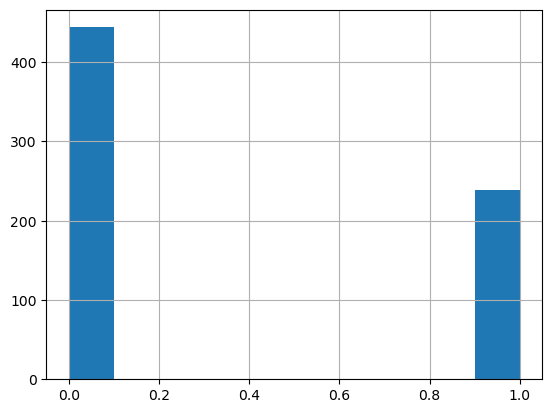

In [42]:
cancerdata["Class"].hist()

A histogram plot of class coloumn is taken to analyze the number of cancerous and non cancerous cases. It shows a large differene in the numbers of both.

###### To check for corelation between each features

In [43]:
corr = cancerdata.iloc[:,:-1].corr(method="pearson")

In [44]:
corr

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cl.thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957
Cell.size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755
Cell.shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258
Marg.adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898
Epith.c.size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583
Bare.nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
Bl.cromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011
Normal.nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000


###### heat map

<AxesSubplot: >

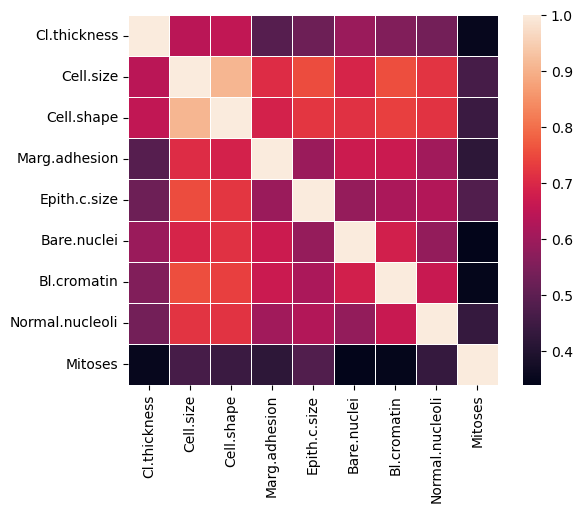

In [45]:
sns.heatmap(corr, square=True, linewidths=.4)

###### Heat map showing the correlation of all coefficient features in the matrix. It shows the depenencies of each feature to one another. The features should be independent to implement Naive Bayes.

###### EDA Of all features


<AxesSubplot: xlabel='Cl.thickness', ylabel='Count'>

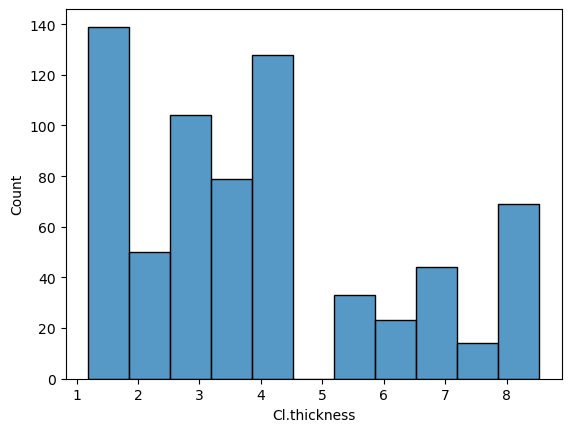

In [46]:
sns.histplot(cancerdata, x="Cl.thickness")


###### The Cl.thickness histogram shows that thickness is distributed with more counts is when thickness is less than 5. The count remains moderate throughout every range except bbetween 4 and 6.

<AxesSubplot: xlabel='Cell.size', ylabel='Count'>

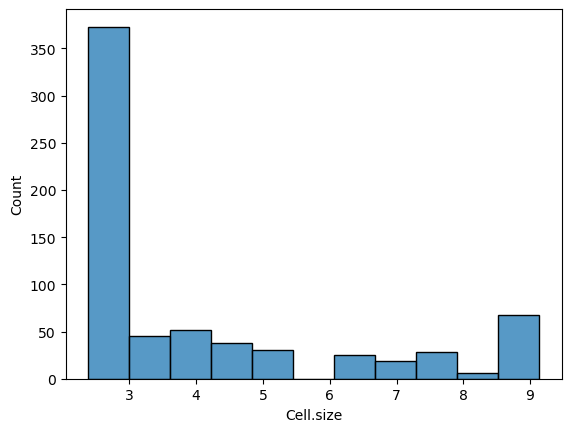

In [47]:
sns.histplot(cancerdata, x="Cell.size")

###### The cell size histogram plots clearly states that majority of the dataset lies when size is less than 3 indicating the normal range.

<AxesSubplot: xlabel='Cell.shape', ylabel='Count'>

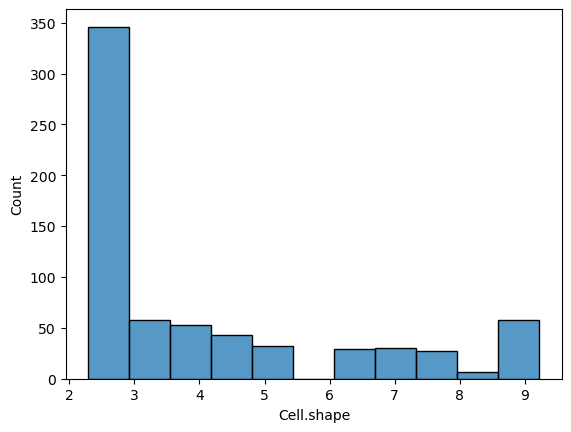

In [48]:
sns.histplot(cancerdata, x="Cell.shape")

###### The cell shape histogram plots clearly states that majority of the dataset lies when shape is between 2 and 3 and reduces when the range increases till cell shape is 9.

<AxesSubplot: xlabel='Marg.adhesion', ylabel='Count'>

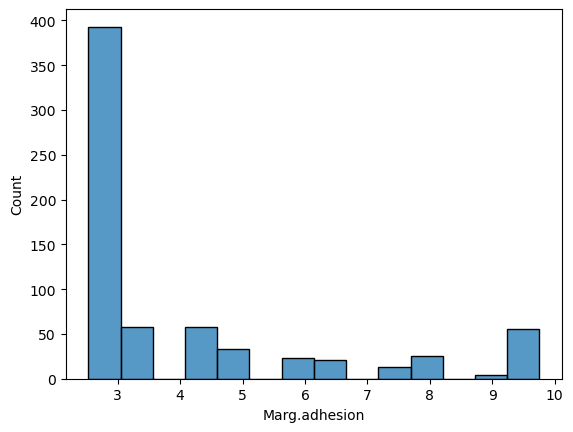

In [49]:
sns.histplot(cancerdata, x="Marg.adhesion")

###### The Marg.adhesion histogram plots clearly states that majority of the dataset lies when size is less than 3 indicating the normal range and reduces uniformly till 9.

<AxesSubplot: xlabel='Epith.c.size', ylabel='Count'>

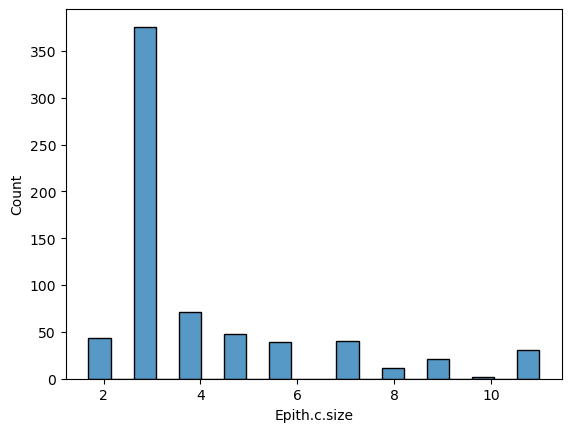

In [50]:
sns.histplot(cancerdata, x="Epith.c.size")

###### The Epith.c.size histogram plots clearly states that majority of the dataset lies between 2 and 4 indicating the normal range and reduces uniformly till 10.

<AxesSubplot: xlabel='Bare.nuclei', ylabel='Count'>

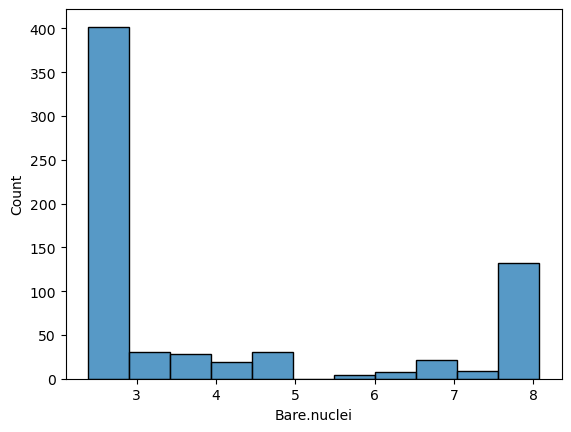

In [51]:
sns.histplot(cancerdata, x="Bare.nuclei")

###### The Bare.nuclei histogram plots clearly states that majority of the dataset lies below 3 indicating the normal range and reduces uniformly till 7.

<AxesSubplot: xlabel='Bl.cromatin', ylabel='Count'>

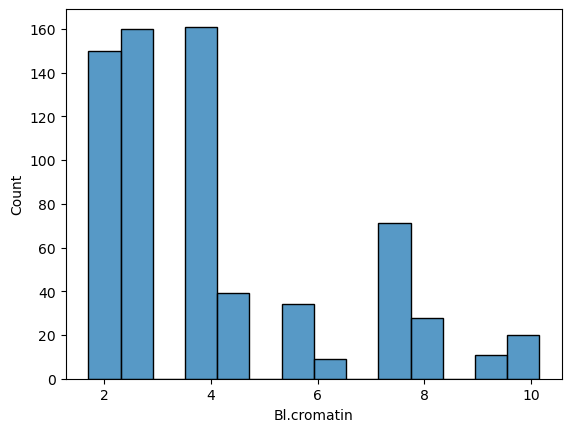

In [52]:
sns.histplot(cancerdata, x="Bl.cromatin")

###### The Bl.cromatin histogram plots clearly states that majority of the dataset lies between 2 and 4 indicating the normal range and reduces uniformly.

<AxesSubplot: xlabel='Normal.nucleoli', ylabel='Count'>

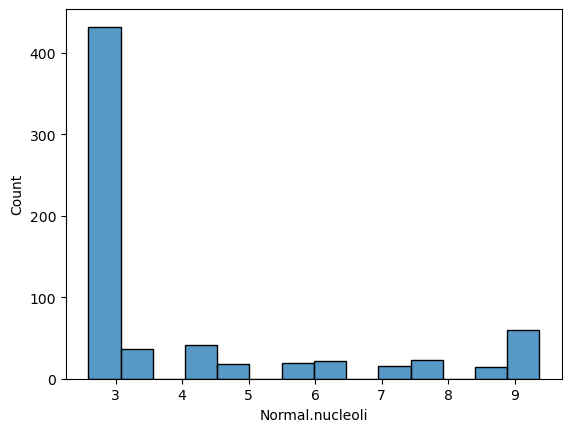

In [53]:
sns.histplot(cancerdata, x="Normal.nucleoli")

###### The Normal.nucleoli histogram plots clearly states that majority of the dataset lies below 3 indicating the normal range.

<AxesSubplot: xlabel='Mitoses', ylabel='Count'>

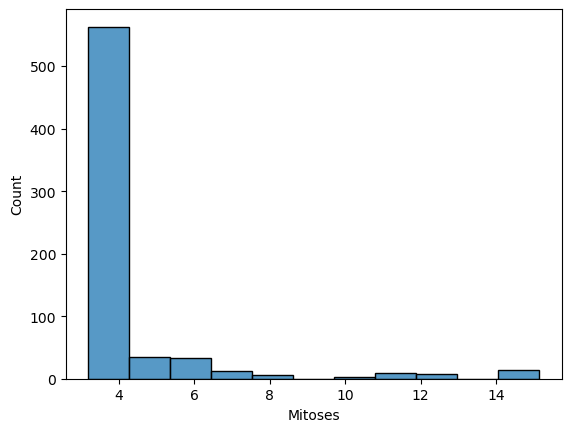

In [54]:
sns.histplot(cancerdata, x="Mitoses")

###### The Mitoses histogram plots clearly states that majority of the dataset lies below 4 indicating the normal range.

##### The histogram plot of all the features shows the normal ranges and how the counts differs with the range in every feature and the patterns associated with it. 

## Naive Bayes

###### The cancer dataset is split into training and test data


In [55]:
x = cancerdata.drop('Class',axis=1)
y = cancerdata.Class
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)

The whole dataset is split into 30% os test data and 70% for training data.

###### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###### Training the Naive Bayes Classifier Model


In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Training the Naive Bayes Classifier models using GaussinNB Function.

###### Prediction of the model


In [58]:
y_pred = classifier.predict(x_test)



In [59]:
 print ("The predicted values are",y_pred  )


The predicted values are [0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [60]:
comparison = np.concatenate((y_test.values.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1) 
print("Comparison of testing and predicitive dataset ",comparison)

Comparison of testing and predicitive dataset  [[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 

###### Making the Confusion Matrix


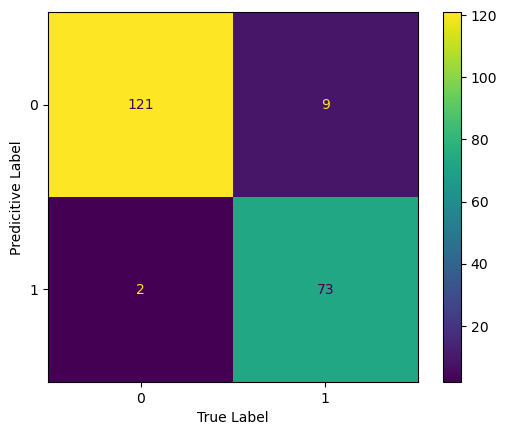

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.xlabel("True Label")
plt.ylabel("Predicitive Label")
plt.show()



The confusion Matrix is divided into 4. The top left Corner is True-Positive where the Actual dataset is Positive and Predictive value is positive having 121 Counts.

The top right is False- Positive where the dataset value is True but predicition is false having 9 counts.

The bottom left is False-Negative where dataset is negative but predicted positive having 2 counts

The bottom right is True-Negative where both actual dataset and predicited is negative having 73 counts.


###### Performance of Naive Bayes Model

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
Accuracy = accuracy_score(y_test,y_pred)
print("The Accuracy score is",Accuracy*100)
Precision = metrics.precision_score(y_test, y_pred)
print("The Precision is",Precision*100)
Recall = metrics.recall_score(y_test, y_pred)
print("The Recall Score is",Recall*100)
F1 = metrics.f1_score(y_test, y_pred)
print("F1 score is",F1*100)

The Accuracy score is 94.6341463414634
The Precision is 89.02439024390245
The Recall Score is 97.33333333333334
F1 score is 92.99363057324841


###### Accuracy = (TP + TN)/ TP + TN + FP + FN

######  Precision = TP / TP + FP 

######  Recall = TP / TP + FN

######  F1 Score = 2*( (Precision * Recall)/Precision + Recall


Accuracy , F1 score, Precision and Recall Score are the parametres for checking the performance of the Naive Bayes model. 

Accuracy is amount of properly made predictions / total number of predictions. The accuracy we have here is 94.6%

Precision is the ratio of True-Positives and total positives predicted and our Precision rate is 89%.

Recall is the ratio of True-Positives to all the positives and our Recall score is 97%. 

F1 Score is calculated by accounting both Precision and Recall score. A good F1 score is received when we have a good precision and recall score. The F1 score we have here is 92.9 % which is almost equal to 93%. 

All the scores are takes as Percentage by multiplying by 100.

###### Calculating ROC Curve


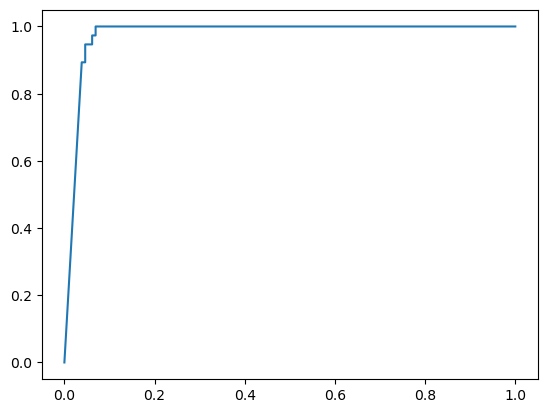

In [63]:
plt.figure(0).clf()

mdl1 = GaussianNB()
mdl1.fit(x_train, y_train)
y_pred = mdl1.predict_proba(x_test)[:, 1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr1,tpr1)


Receiver operating characteristics curve (ROC Curve) is a graph which uses true positive rates(TPR) and false positive rates(FPR). 

Here the TPR is ratio of positive data which are correclt predicted positive. TPR is inversly proptional to the number of positive datapoints we miss.

FPR is the number of negative datapoints that were consiedered postive. FPR is proptional to the number of negative data points misclassified.



###### Calculating AUC Curve

In [64]:
from sklearn.metrics import roc_auc_score


auc_1 = roc_auc_score(y_test, y_pred)

print("The AUC Score for Naive Bayes is",auc_1)

The AUC Score for Naive Bayes is 0.9768717948717949


Area Under The Curve (AUC Curve) is the area that comes under the ROC Curve and is cummlativly called as AUROC Curvea and the value is 0.9768 . Higher the AUROC Curve value higher is the percentage it can distinguish between positive and negative classes.


###### Explanation of Naive Bayes

Here we can understand that Naive Bayes is a Probability Classifier which is based on Bayes theorm which is P(A|B) = P(B/A)*P(A) / P(B) . Here P(A) is prior of A which is probability of event before event is seen and P(B) is consediered the evidence. 

P(A|B) is the posterior probability where probability is considered after evidence is seen. 


Here it is assumed that there should be an independence between the features and each feature is equally important. It takes in details from prior events to predict posterior events. Here we have taken GaussianNB for our classification where we use normal distribution for the same. 

Using GaussianNB we were able to classify efficiently with a extremely good scores which are:

The Accuracy score is 94.63,
The Precision is 89.02,
The Recall Score is 97.33,
F1 score is 92.99,

The AUROC Score is 0.97 which is extremely good and is capable to efficently distinguish between positive and negative classes.








## Logistic Regression Classifier

###### The Cancer dataset is split into training and test data

In [65]:
a = cancerdata.drop('Class',axis=1)
b = cancerdata.Class
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 0)

The dataset is split into training and testing with 30% going for testing and rest for training.


###### Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

###### Training the Logisitic Regression modelling

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(a_train, b_train)
LogisticRegression()

LogisticRegression()

######  Predicting the results of Logistic Regression modelling

In [68]:
b_pred = classifier.predict(a_test)
print("The predicted values are",b_pred)

The predicted values are [0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


###### comparing the real values vs prediction

In [69]:
comparison = np.concatenate((b_test.values.reshape(-1,1), b_pred.reshape(-1,1)), axis = 1) 
print("Comparison of testing and predicitive dataset ",comparison)

Comparison of testing and predicitive dataset  [[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 

###### Confusion Matrix 

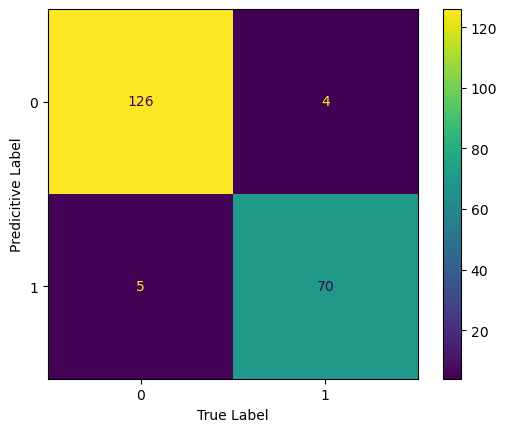

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, a_test, b_test)
plt.xlabel("True Label")
plt.ylabel("Predicitive Label")
plt.show()



The confusion Matrix is divided into 4. The top left Corner is True-Positive where the Actual dataset is Positive and Predictive value is positive having 126 Counts.

The top right is False- Positive where the dataset value is True but predicition is false having 4 counts.

The bottom left is False-Negative where dataset is negative but predicted positive having 5 counts

The bottom right is True-Negative where both actual dataset and predicited is negative having 70 counts.


In [71]:

Accuracy = metrics.accuracy_score(b_test, b_pred)
print("The Accuracy is",Accuracy*100)
Precision = metrics.precision_score(b_test, b_pred)
print("The Precision is",Precision*100)
Recall = metrics.recall_score(b_test, b_pred)
print("The Recall Score is",Recall*100)
F1 = metrics.f1_score(b_test, b_pred)
print("F1 score is",F1*100)

The Accuracy is 95.60975609756098
The Precision is 94.5945945945946
The Recall Score is 93.33333333333333
F1 score is 93.95973154362416


Accuracy , F1 score, Precision and Recall Score are the parametres for checking the performance of the Logisitic Regression model. 

Accuracy is amount of properly made predictions / total number of predictions. The accuracy we have here is 95.6%

Precision is the ratio of True-Positives and total positives predicted and our Precision rate is 94.5%.

Recall is the ratio of True-Positives to all the positives and our Recall score is 93.3%. 

The F1 score we have here is 93.9 % which is almost equal to 94%. 

All the scores are takes as Percentage by multiplying by 100.

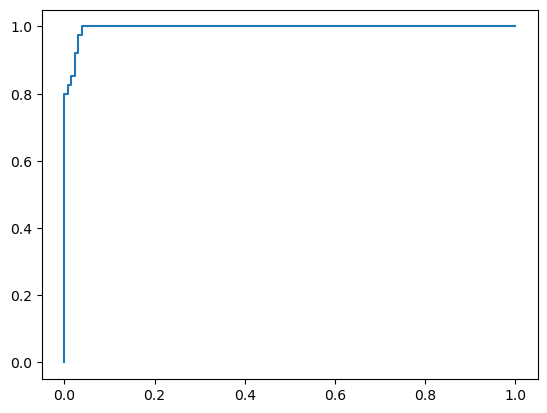

In [72]:
plt.figure(0).clf()

mdl2 = LogisticRegression()
mdl2.fit(a_train, b_train)
b_pred = mdl2.predict_proba(a_test)[:, 1]
fpr2, tpr2, _ = metrics.roc_curve(b_test, b_pred)
auc2 = metrics.roc_auc_score(b_test, b_pred)
plt.plot(fpr2,tpr2)


In [73]:
from sklearn.metrics import roc_auc_score

auc_2 = roc_auc_score(b_test, b_pred)

print("The AUC Score for Logistic Regression is",auc_2)

The AUC Score for Logistic Regression is 0.9951794871794872


The AUROC Value we received here is 0.9951, which shows it can distinguish positive and negative classes really well.

###### Explanation of Logistic Regression


A logistic Regression is a classifier which aims to classify a dataset using categorial outcomes. Here out outcomes was binomial where the class can either be positive or negative. It can have more than two outcomes too and is called multinomial. We use a sklearn module for classiying using Logsitic Regression and use the LogsisticRegression function in it.

A predicition is done using it and then is compared with the test class to get the scores for the classifier. Mathematically a sigmoid function is used to perform Logistic Regression which is shown as a S curve in a graph using sig(t) = 1/(1+e^-t).

Using the Logistic Regression function, I was able to classify the cancer dataset with the below scores:


The Accuracy is 95.60,
The Precision is 94.59,
The Recall Score is 93.33,
F1 score is 93.95,

The AUROC score for the Logistic Regression is 0.9951 which is Extremely good and can distinguish positive and negative classes really well.


##### Comparing Both Naive Bayes and Logistic Regression


Naive Bayes Parametres :
The Accuracy score is 94.6%
The Precision is 89%
The Recall Score is 97.3%
F1 score is 92.9%

Logistic Regression Parametres:

The Accuracy is 95.6%
The Precision is 94.5%
The Recall Score is 93.3%
F1 score is 93.9%

Here we can see Logistic Regression overperforms Naive bayes slighly in everything except Recall. 

When it comes to AUROC Curve Naive Bayes gets 97.69 meanwhile Logistic Regression gets 99.51 where Logisitic regression outperforms Naive Bayes slighly.




In [74]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

comparison_models = []
comparison_models.append(('Naive Bayes', GaussianNB()))
comparison_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
for name, model in comparison_models:
  compare = cross_val_score(model, x, y, scoring='accuracy')

  print("%s: Mean Accuracy = %.2f%% and Standard Deviation Accuracy = %.2f%%" % (name, compare.mean()*100, compare.std()*100))

Naive Bayes: Mean Accuracy = 95.90% and Standard Deviation Accuracy = 1.76%
Logistic Regression: Mean Accuracy = 96.05% and Standard Deviation Accuracy = 3.44%


This is the comparison of both Naive Bayes and Logistic Regression model on the basis of Mean and Standard deviation of Accuracy. Logisitic Regression performs just slighly better than Naive bayes in both comparisons.

In [75]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

comparison_models = []
comparison_models.append(('Naive Bayes', GaussianNB()))
comparison_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
for name, model in comparison_models:
  compare = cross_val_score(model, x, y, scoring='precision')

  print("%s: Mean Precision = %.2f%% and Standard Deviation Precision = %.2f%%" % (name, compare.mean()*100, compare.std()*100))

Naive Bayes: Mean Precision = 91.92% and Standard Deviation Precision = 4.21%
Logistic Regression: Mean Precision = 96.27% and Standard Deviation Precision = 4.25%


This is the comparison of both Naive Bayes and Logistic Regression model on the basis of Mean and Standard deviation of Precision. Logisitic Regression performs better than Naive bayes in the comparison while Standard deviation is almost similar.

In [76]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

comparison_models = []
comparison_models.append(('Naive Bayes', GaussianNB()))
comparison_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
for name, model in comparison_models:
  compare = cross_val_score(model, x, y, scoring='recall')

  print("%s: Mean Recall = %.2f%% and Standard Deviation Recall = %.2f%%" % (name, compare.mean()*100, compare.std()*100))

Naive Bayes: Mean Recall = 97.07% and Standard Deviation Recall = 1.04%
Logistic Regression: Mean Recall = 92.48% and Standard Deviation Recall = 8.79%


This is the comparison of both Naive Bayes and Logistic Regression model on the basis of Mean and Standard deviation of Precision. Naive bayes performs better than Logistic Regression model in the comparison while Standard deviation is higher for Logistic Regression model.

In [77]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

comparison_models = []
comparison_models.append(('Naive Bayes', GaussianNB()))
comparison_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
for name, model in comparison_models:
  compare = cross_val_score(model, x, y, scoring='f1')

  print("%s: Mean F1 Score = %.2f%% and Standard Deviation F1 Score = %.2f%%" % (name, compare.mean()*100, compare.std()*100))

Naive Bayes: Mean F1 Score = 94.37% and Standard Deviation F1 Score = 2.28%
Logistic Regression: Mean F1 Score = 94.08% and Standard Deviation F1 Score = 5.50%


This is the comparison of both Naive Bayes and Logistic Regression model on the basis of Mean and Standard deviation of F1 Score. Naive bayes performs just slighly better than Logistic Regression model in the comparison while Standard deviation is higher for Logistic Regression model.

###### Comparing AUROC of both Models

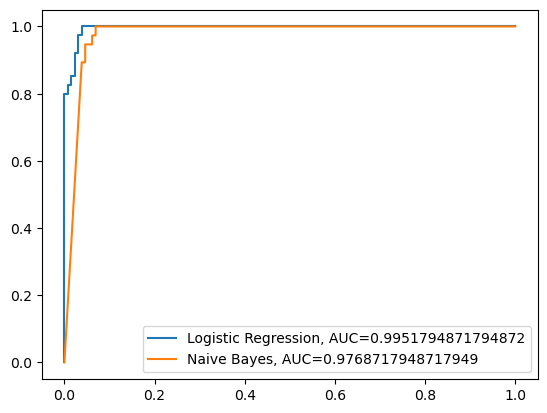

In [78]:
plt.figure(0).clf()

mdl3 = LogisticRegression()
mdl3.fit(a_train, b_train)
b_pred = mdl3.predict_proba(a_test)[:, 1]
fpr3, tpr3, _ = metrics.roc_curve(b_test, b_pred)
auc3 = metrics.roc_auc_score(b_test, b_pred)
plt.plot(fpr3,tpr3,label="Logistic Regression, AUC="+str(auc3))

mdl4 = GaussianNB()
mdl4.fit(x_train, y_train)
y_pred = mdl4.predict_proba(x_test)[:, 1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred)
auc4 = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr4,tpr4,label="Naive Bayes, AUC="+str(auc4))

plt.legend()

Here the AUROC Score of Logistic Regression which is 0.9952 slightly overperforms Naive bayes which is 0.9769  and can be consiedered a better model even though both are extremely goood.

###### Conclusion

Breast Cancer dataset was classified using Naive Bayes and Logistic Regression and both models were able to classify with really good scores. 

Logistic Regression overperforms Naive Bayes and can be considered a better model in a small margin.